In [76]:
#Import Stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [45]:
#Credit Data
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [46]:
#Real Estate
df_NY = pd.read_csv("NYC_Real_Estate.csv")
df_NY.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h2>Part 1: NYC Real Estate EDA

In [47]:
df_NY.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,4.824800e+04
mean,3.251554,4984.154535,234.400742,10939.604087,2.569682,2.837755,3.672552e+03,1827.738082,1.155576e+06
std,0.903331,3427.528068,496.413133,1072.741157,17.468624,20.752771,2.947540e+04,464.418481,1.340423e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2204.000000,21.000000,10469.000000,1.000000,1.000000,8.280000e+02,1920.000000,8.056000e+04
50%,3.000000,4660.000000,45.000000,11217.000000,1.000000,1.000000,1.620000e+03,1931.000000,4.800000e+05
75%,4.000000,6996.000000,94.000000,11237.000000,2.000000,2.000000,2.520000e+03,1961.000000,8.300000e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [48]:
df_NY['ZIP CODE'].value_counts()

11201    1324
11235    1312
11234    1165
11229     916
11215     899
         ... 
10006       1
10167       1
10803       1
10044       1
11005       1
Name: ZIP CODE, Length: 180, dtype: int64

In [49]:
df_NY = df_NY[df_NY['SALE PRICE']>0]
df_NY = df_NY.drop(columns={"TAX CLASS AT TIME OF SALE", "LOT", "RESIDENTIAL UNITS", "BUILDING CLASS AT TIME OF SALE" })
df_NY.describe()

,BOROUGH,BLOCK,ZIP CODE,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,38020.000000,38020.000000,38020.000000,38020.000000,3.802000e+04,38020.000000,3.802000e+04
mean,3.368438,5126.288769,10936.771883,2.741978,3.574482e+03,1852.286744,1.466445e+06
std,0.964818,3634.279630,1023.802931,21.678107,3.007989e+04,417.960253,1.508489e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,3.000000,2135.000000,10466.000000,1.000000,8.835000e+02,1920.000000,3.850000e+05
50%,3.000000,4664.000000,11217.000000,1.000000,1.552000e+03,1931.000000,6.000000e+05
75%,4.000000,7273.000000,11358.000000,2.000000,2.352000e+03,1962.000000,9.500000e+05
max,5.000000,16319.000000,11694.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [50]:
df_NY.head()

,BOROUGH,BLOCK,ZIP CODE,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,392,10009,5,6440,1900,6625000
1,1,402,10009,10,6794,1913,3936272
2,1,404,10009,6,4615,1900,8000000
3,1,406,10009,8,4226,1920,3192840
4,1,387,10009,24,18523,1920,16232000


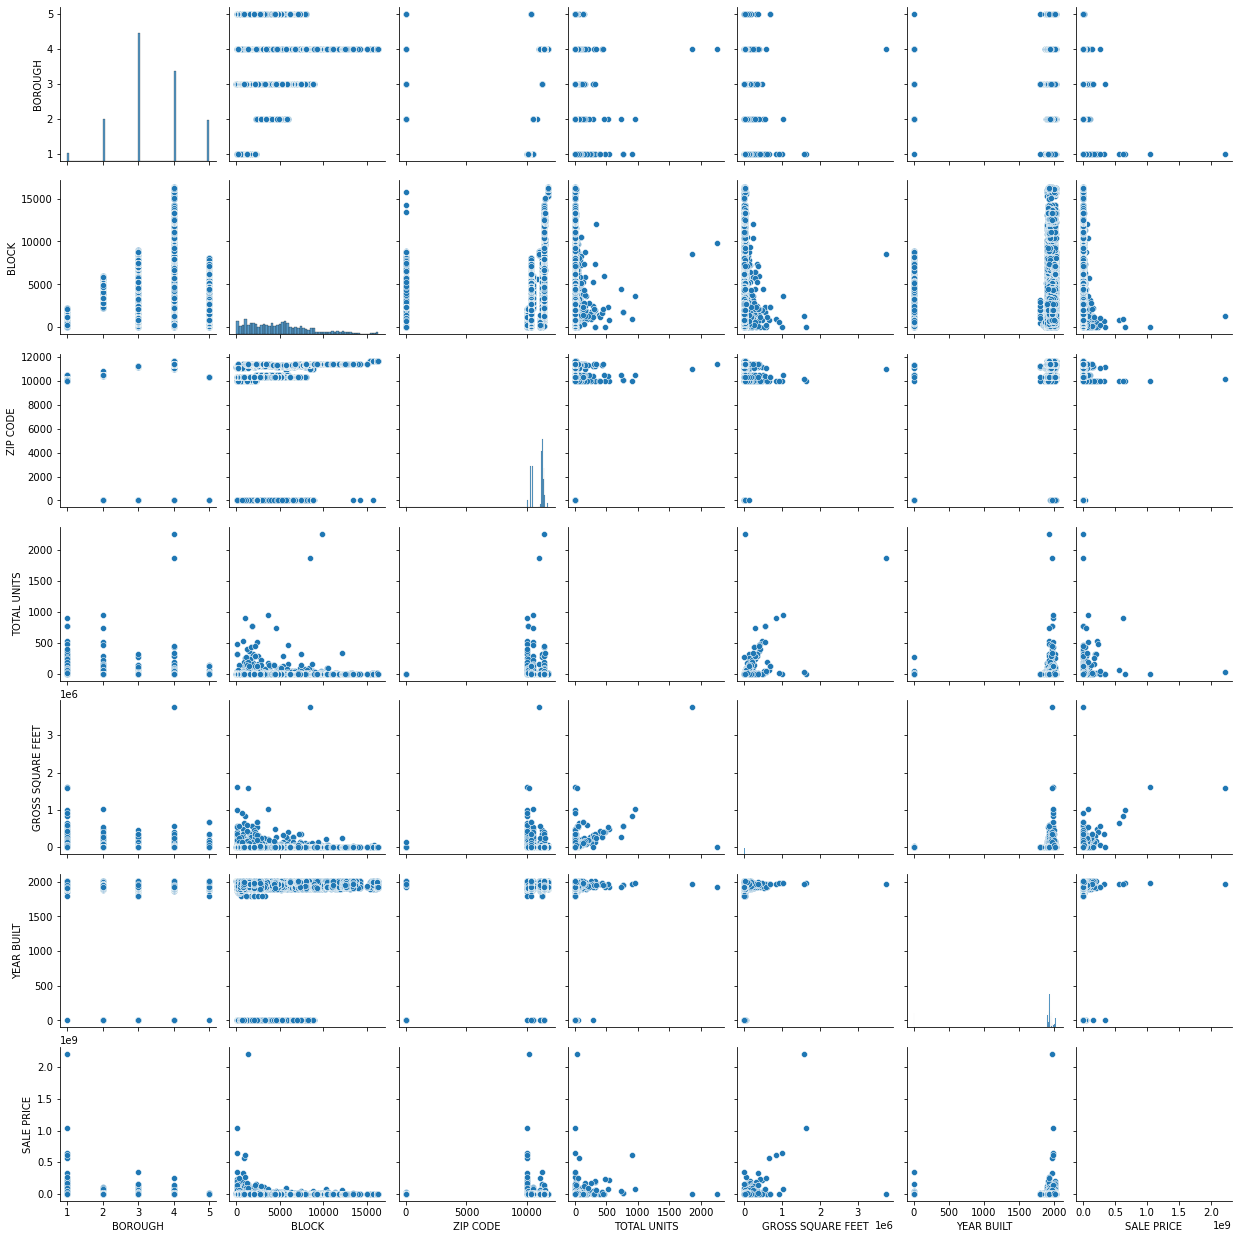

In [51]:
sns.pairplot(df_NY)

<h2>Credit Risk Data Set EDA<h2>

In [1]:
df.head()
#DO THIS 
#df2.isna().sum()

NameError: name 'df' is not defined

In [63]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<h2>Part 2: Linear Regression<h2>

In [52]:
y = np.array(df_NY["SALE PRICE"]).reshape(-1,1)
y.shape

(38020, 1)

In [53]:
x = np.array(df_NY)
x.shape

(38020, 7)

In [54]:
model = LinearRegression().fit(x,y)

In [55]:
#Get some info on our new regression model
r_sq = model.score(x, y)
print('R-squared:', r_sq)
print('Intercept:', model.intercept_[0])

#Our coefficent/slope is now an array of values - one per X. 
#Visualizing the regression would be a 14D space, where these are the slopes in each dimension. 
print('Coefs:', model.coef_[0])

R-squared: 1.0
Intercept: -2.8405338525772095e-08
Coefs: [ 3.93535563e-09  1.50401913e-12  6.03231644e-13  9.42062219e-10
 -1.03599377e-12  1.02286896e-12  1.00000000e+00]


In [57]:
tmp = model.predict(x)
mean_squared_error(tmp, y, squared=False)

2.4424039746720688e-08

In [58]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1 = pd.DataFrame(y, columns={"Y values"})
tmp2 = pd.DataFrame(tmp, columns={"Predictions"})
tmp3 = pd.DataFrame((y-tmp), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.head()

,Y values,Predictions,Residual
0,6625000,6625000.0,1.676381e-08
1,3936272,3936272.0,1.257285e-08
2,8000000,8000000.0,1.303852e-08
3,3192840,3192840.0,1.164153e-08
4,16232000,16232000.0,7.450581e-09


<h2>logistic regression<h2>

In [73]:
y1 = np.array(df["loan_status"]).reshape(-1,1)
y1.shape

(32581, 1)

In [74]:
dfc = df.drop(columns={"loan_status"})
x1 = np.array(dfc)
dfc.shape

(32581, 11)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33)

md2 = LogisticRegression().fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

ValueError: could not convert string to float: 'RENT'